# 1. 데이터 이해

## 1.2 데이터 읽기와 확인

## 분석 데이터 세트 로드

In [29]:
import pandas as pd

dat_df = pd.read_csv('dataset/energydata.csv', sep=',')
dat_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09


### 데이터의 행수와 열수 확인

In [30]:
print(dat_df.shape)

(17424, 13)


### 데이터형 확인

In [31]:
print(dat_df.dtypes)

date           object
Appliances      int64
lights          int64
T1            float64
RH_1          float64
T2            float64
RH_2          float64
T3            float64
RH_3          float64
T4            float64
RH_4          float64
T5            float64
RH_5          float64
dtype: object


### datetime형으로 데이터 변환

In [32]:
dat_df['date'] = pd.to_datetime(dat_df['date'], format='%Y-%m-%d %H:%M:%S')
print(dat_df['date'].dtypes)
print(type(dat_df['date'][0]))

datetime64[ns]
<class 'pandas._libs.tslibs.timestamps.Timestamp'>


### 한 행 전과의 시간차(분) 계산

In [33]:
dat_df['dif_min'] = dat_df['date'].diff().dt.total_seconds()/60
# diff를 사용하여 한 행전의 값과의 차이 계산, dt_total_seconds에 의해 초단위 변환 이것을 60으로 나누어 분으로 환산

dat_df['dif_min'] = dat_df['dif_min'].fillna(0)
dat_df['dif_min'].head()

0     0.0
1    10.0
2    10.0
3    10.0
4    10.0
Name: dif_min, dtype: float64

### 경과시간(분) 계산(1)

In [34]:
dat_df['cum_min'] = dat_df['dif_min'].cumsum()
dat_df[['date', 'cum_min']].head()

,date,cum_min
0,2016-01-11 17:00:00,0.0
1,2016-01-11 17:10:00,10.0
2,2016-01-11 17:20:00,20.0
3,2016-01-11 17:30:00,30.0
4,2016-01-11 17:40:00,40.0


### 연습문제1

In [35]:
dat_df['cum_hour'] = (dat_df['cum_min']/60).round(2).astype(int)
dat_df[['date', 'cum_min', 'cum_hour']].head(10)

,date,cum_min,cum_hour
0,2016-01-11 17:00:00,0.0,0
1,2016-01-11 17:10:00,10.0,0
2,2016-01-11 17:20:00,20.0,0
3,2016-01-11 17:30:00,30.0,0
4,2016-01-11 17:40:00,40.0,0
5,2016-01-11 17:50:00,50.0,0
6,2016-01-11 18:00:00,60.0,1
7,2016-01-11 18:10:00,70.0,1
8,2016-01-11 18:20:00,80.0,1
9,2016-01-11 18:30:00,90.0,1


## 1.3 결손값 확인

### 결손값 개수 확인

In [36]:
print(dat_df.isnull().sum(axis=1).sort_values(ascending=False))
print(dat_df.isnull().sum(axis=0))

9699     1
8604     1
14047    1
8586     1
11427    1
        ..
5813     0
5814     0
5815     0
5816     0
17423    0
Length: 17424, dtype: int64
date          0
Appliances    0
lights        0
T1            1
RH_1          0
T2            0
RH_2          1
T3            2
RH_3          0
T4            0
RH_4          0
T5            1
RH_5          0
dif_min       0
cum_min       0
cum_hour      0
dtype: int64


## 1.4 통계량 계산

### 각 통계량 항목 계산

In [37]:
dat_df.describe()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,dif_min,cum_min,cum_hour
count,17424.000000,17424.000000,17423.000000,17424.000000,17424.000000,17423.000000,17422.000000,17424.000000,17424.000000,17424.000000,17423.000000,17424.000000,17424.000000,17424.000000,17424.000000
mean,97.136134,4.032943,21.370848,39.892301,19.960777,40.209553,21.851889,39.165869,20.437045,38.753288,19.198926,51.053839,9.999426,87115.000000,1451.500000
std,103.247863,8.131761,1.407637,3.716096,1.949825,3.836293,1.705699,3.210397,1.775985,4.274644,1.525227,9.092618,0.075758,50300.198807,838.336598
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,30.663333,15.100000,27.660000,15.330000,29.815000,0.000000,0.000000,0.000000
25%,50.000000,0.000000,20.600000,37.163333,18.666667,37.863333,20.600000,36.790000,19.338333,35.326667,18.100000,45.400000,10.000000,43557.500000,725.750000
50%,60.000000,0.000000,21.390000,39.326667,19.700000,40.360000,21.790000,38.420667,20.390000,38.133333,19.100000,48.900000,10.000000,87115.000000,1451.500000
75%,100.000000,0.000000,22.200000,42.566875,20.926667,43.000000,22.890000,41.433333,21.500000,41.658333,20.200000,53.830278,10.000000,130672.500000,2177.250000
max,1080.000000,70.000000,25.700000,63.360000,29.856667,56.026667,27.600000,50.163333,26.200000,51.090000,25.745000,96.321667,10.000000,174230.000000,2903.000000


### 연습문제2

In [38]:
dat_df.groupby('cum_hour').mean()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,dif_min,cum_min
cum_hour,,,,,,,,,,,,,,
0,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667,8.333333,25.0
1,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778,10.000000,85.0
2,173.333333,25.000000,20.495556,52.805556,19.925556,46.061667,20.052222,47.227361,18.969444,47.815556,17.136111,55.869861,10.000000,145.0
3,125.000000,35.000000,20.961111,48.453333,20.251111,45.632639,20.213889,47.268889,19.190833,49.227917,17.615556,74.027778,10.000000,205.0
4,103.333333,23.333333,21.311667,45.768333,20.587778,44.961111,20.373333,46.164444,19.425556,47.918889,18.427222,69.037778,10.000000,265.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,56.666667,0.000000,24.967500,48.517361,27.379524,40.701429,25.823119,45.245363,26.069643,44.474363,23.866389,52.234722,10.000000,173965.0
2900,73.333333,0.000000,25.175000,48.101111,27.150571,40.955762,25.955476,44.834286,26.100000,44.225524,23.890000,51.651111,10.000000,174025.0
2901,80.000000,0.000000,25.417222,47.490000,26.933018,40.943518,26.070000,44.574286,26.120476,43.966810,23.963333,51.218889,10.000000,174085.0


In [39]:
dat_df.groupby('cum_hour').std()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,dif_min,cum_min
cum_hour,,,,,,,,,,,,,,
0,5.477226,5.477226,0.000000,0.586449,0.000000,0.111888,0.000000,0.112421,0.053972,0.179315,0.021082,0.068605,4.082483,18.708287
1,208.678381,11.690452,0.094249,0.318235,0.098334,0.049065,0.030984,0.046380,0.044907,0.303102,0.027217,0.040369,0.000000,18.708287
2,141.515606,17.606817,0.276355,2.629391,0.251738,1.145478,0.140676,1.626932,0.048736,0.875112,0.042709,0.746929,0.000000,18.708287
3,37.282704,8.366600,0.089086,1.753466,0.064141,0.505110,0.050527,0.573855,0.166626,0.602464,0.276379,8.971516,0.000000,18.708287
4,5.163978,5.163978,0.132945,0.245834,0.116651,0.172597,0.040825,0.143738,0.070669,0.373986,0.373960,11.515309,0.000000,18.708287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2899,8.164966,0.000000,0.060807,0.315921,0.068783,0.134971,0.063521,0.330220,0.026317,0.202504,0.036673,0.243608,0.000000,18.708287
2900,10.327956,0.000000,0.087121,0.162845,0.075704,0.234359,0.053904,0.112308,0.000000,0.052098,0.000000,0.131363,0.000000,18.708287
2901,8.944272,0.000000,0.096227,0.226087,0.041438,0.208747,0.046904,0.133233,0.033826,0.132233,0.046380,0.188452,0.000000,18.708287


### 1.5 데이터 시각화

Text(0, 0.5, 'Appliance')

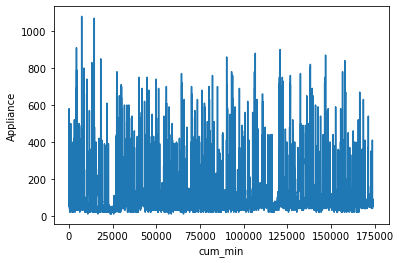

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(dat_df['cum_min'], dat_df['Appliances'])

plt.xlabel('cum_min')
plt.ylabel('Appliance')


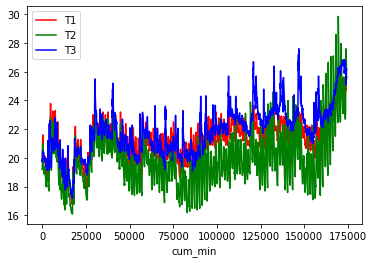

In [41]:
plt.plot(dat_df['cum_min'], dat_df['T1'], '-r', label='T1') #T1은 부엌의 온도
plt.plot(dat_df['cum_min'], dat_df['T2'], '-g', label='T2') #T2는 거실의 온도
plt.plot(dat_df['cum_min'], dat_df['T3'], '-b', label='T3') #T3는 세탁실의 온도

plt.xlabel('cum_min')
plt.legend()
plt.show()

# 2. 데이터 준비

## 2.1 데이터 읽기와 확인

### 전처리 대상의 데이터 읽기

In [42]:
import pandas as pd

dat_df = pd.read_csv('dataset/energydata.csv', sep=',')
dat_df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09


## 2.1 결손값 보완

시계열 데이터는 연속한 데이터이며, 데이터 점의 순서에 의미가 있다. <br>
그래서 항목을 0이나 정수, 평균치로 보완해버리면, 연속성이 없어져 버린다.<br>
따라서 전 행의 값이나 전후의 값으로 보완하는 것이 바람직하다.

### 결손값 표시

In [43]:
dat_df[8585:8588]

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
8585,2016-03-11 07:50:00,70,0,20.2,37.160000,16.5,42.430000,20.39,37.500000,19.700000,34.360000,18.000000,46.660000
8586,2016-03-11 08:00:00,280,0,20.2,37.463333,16.6,42.766667,NaN,37.500000,19.700000,34.633333,18.066667,46.193333
8587,2016-03-11 08:10:00,180,10,20.2,37.530000,16.6,42.966667,20.29,37.363333,19.666667,34.723333,18.100000,45.723333


### NaN을 통한 결손값 보완

In [44]:
dat_df[8585:8588].fillna(method='ffill')
# fillna인자에 method='ffill'을 지정하면, 전행의 값을 대입한다.
# fillna인자에 method='bfill'을 지정하면, 후행의 값을 대입한다.

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
8585,2016-03-11 07:50:00,70,0,20.2,37.160000,16.5,42.430000,20.39,37.500000,19.700000,34.360000,18.000000,46.660000
8586,2016-03-11 08:00:00,280,0,20.2,37.463333,16.6,42.766667,20.39,37.500000,19.700000,34.633333,18.066667,46.193333
8587,2016-03-11 08:10:00,180,10,20.2,37.530000,16.6,42.966667,20.29,37.363333,19.666667,34.723333,18.100000,45.723333


### 전후행의 값의 평균치로 결손값 보완

In [45]:
dat_df = dat_df.interpolate()
dat_df[8585:8588]

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
8585,2016-03-11 07:50:00,70,0,20.2,37.160000,16.5,42.430000,20.39,37.500000,19.700000,34.360000,18.000000,46.660000
8586,2016-03-11 08:00:00,280,0,20.2,37.463333,16.6,42.766667,20.34,37.500000,19.700000,34.633333,18.066667,46.193333
8587,2016-03-11 08:10:00,180,10,20.2,37.530000,16.6,42.966667,20.29,37.363333,19.666667,34.723333,18.100000,45.723333


## 2.3 시간축 작성

### 경과시간(분) 계산(2)

In [46]:
dat_df['date'] = pd.to_datetime(dat_df['date'], format='%Y-%m-%d %H:%M:%S')
dat_df['dif_min'] = dat_df['date'].diff().dt.total_seconds()/60
dat_df['dif_min'] = dat_df['dif_min'].fillna(0)
dat_df['cum_min'] = dat_df['dif_min'].cumsum()
dat_df[['date', 'cum_min']].head()

,date,cum_min
0,2016-01-11 17:00:00,0.0
1,2016-01-11 17:10:00,10.0
2,2016-01-11 17:20:00,20.0
3,2016-01-11 17:30:00,30.0
4,2016-01-11 17:40:00,40.0


### 연습문제4

In [47]:
dat_df['cum_6hour'] = (dat_df['cum_min']/360).round(2).astype(int)

print(dat_df['cum_6hour'].unique())
print(dat_df[['date', 'cum_min', 'cum_6hour']].head(50))

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

### 6시간 단위로 만들기 위한 평균치 계산

In [48]:
dat_df = dat_df.drop(['date', 'dif_min', 'cum_min'], axis=1)
dat_df_mean = dat_df.groupby('cum_6hour').mean()

print(dat_df_mean.shape)
dat_df_mean.head()
# groupby함수를 사용하여 cum_6hour를 집계하는 키로 해서 각 항목의 평균치를 계산합니다.

(484, 12)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
cum_6hour,,,,,,,,,,,,
0,150.000000,31.944444,20.688056,47.345394,20.023148,44.973287,20.111481,46.041875,19.255972,47.379074,17.761597,60.359861
1,81.944444,7.222222,20.858287,45.627708,20.227315,44.286435,20.213588,45.530833,20.740093,46.503634,18.898519,50.261273
2,83.333333,5.555556,19.860463,47.019213,19.140608,44.876698,20.149722,45.269306,19.349259,45.893611,18.163125,50.817454
3,101.111111,0.000000,20.037500,44.843009,19.103377,43.495476,19.907778,44.802407,19.748287,43.536204,17.835370,50.444111
4,78.611111,7.222222,19.947963,43.275394,19.113860,42.606633,19.788704,44.312037,19.555093,42.804491,17.477870,50.732546


### 연습문제5

In [49]:
dat_df_std = dat_df.groupby('cum_6hour').std()

print(dat_df_std.shape)
dat_df_std.head()

(484, 12)


,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
cum_6hour,,,,,,,,,,,,
0,131.366445,13.901582,0.672443,2.998070,0.653222,0.848637,0.278809,1.185530,0.485747,1.282966,0.791008,9.891611
1,101.497908,9.137399,0.460572,0.811346,0.476669,0.342190,0.082826,0.103003,0.560148,0.511257,0.272610,0.339389
2,104.853639,9.085135,0.103157,1.039938,0.167655,0.318816,0.142110,0.261039,0.273491,0.776746,0.178471,1.138170
3,95.999339,0.000000,0.059026,1.091231,0.069944,0.617057,0.046289,0.068936,0.274278,0.622986,0.164863,0.792715
4,83.773599,12.097488,0.151195,0.561101,0.187641,0.418215,0.048003,0.180349,0.341428,0.430826,0.075740,0.247231


In [58]:
dat_features = pd.merge(dat_df_mean, dat_df_std, left_index=True, right_index=True)

print(dat_features.shape)
dat_features.head()

(484, 24)


,Appliances_x,lights_x,T1_x,RH_1_x,T2_x,RH_2_x,T3_x,RH_3_x,T4_x,RH_4_x,...,T1_y,RH_1_y,T2_y,RH_2_y,T3_y,RH_3_y,T4_y,RH_4_y,T5_y,RH_5_y
cum_6hour,,,,,,,,,,,,,,,,,,,,,
0,150.000000,31.944444,20.688056,47.345394,20.023148,44.973287,20.111481,46.041875,19.255972,47.379074,...,0.672443,2.998070,0.653222,0.848637,0.278809,1.185530,0.485747,1.282966,0.791008,9.891611
1,81.944444,7.222222,20.858287,45.627708,20.227315,44.286435,20.213588,45.530833,20.740093,46.503634,...,0.460572,0.811346,0.476669,0.342190,0.082826,0.103003,0.560148,0.511257,0.272610,0.339389
2,83.333333,5.555556,19.860463,47.019213,19.140608,44.876698,20.149722,45.269306,19.349259,45.893611,...,0.103157,1.039938,0.167655,0.318816,0.142110,0.261039,0.273491,0.776746,0.178471,1.138170
3,101.111111,0.000000,20.037500,44.843009,19.103377,43.495476,19.907778,44.802407,19.748287,43.536204,...,0.059026,1.091231,0.069944,0.617057,0.046289,0.068936,0.274278,0.622986,0.164863,0.792715
4,78.611111,7.222222,19.947963,43.275394,19.113860,42.606633,19.788704,44.312037,19.555093,42.804491,...,0.151195,0.561101,0.187641,0.418215,0.048003,0.180349,0.341428,0.430826,0.075740,0.247231


## 2.5 목적변수 작성

### event.csv 파일(전력소비량에 이상이 발생한 날짜의 로그) 읽기

In [50]:
event_df = pd.read_csv('dataset/event.csv', sep=',')
event_df.head()

,date
0,2016-01-12 10:00:00
1,2016-01-13 21:00:00
2,2016-01-14 10:00:00
3,2016-01-14 16:00:00
4,2016-01-14 17:00:00


### 데이터 집약 및 시간 축 작성(1)

In [54]:
import datetime as dt

event_df['date'] = pd.to_datetime(event_df['date'], format='%Y-%m-%d %H:%M:%S')

base_time = '2016-01-11 17:00:00'
event_df['dif_min'] = event_df['date'] - dt.datetime.strptime(base_time, '%Y-%m-%d %H:%M:%S')
event_df['dif_min'] = event_df['dif_min'].dt.total_seconds()/60
event_df['cum_6hour'] = (event_df['dif_min']/360).round(2).astype(int)

event_df.head()

,date,dif_min,cum_6hour
0,2016-01-12 10:00:00,1020.0,2
1,2016-01-13 21:00:00,3120.0,8
2,2016-01-14 10:00:00,3900.0,10
3,2016-01-14 16:00:00,4260.0,11
4,2016-01-14 17:00:00,4320.0,12


### 데이터 집약 및 시간 축 작성(2)

In [55]:
event_df['event'] = 1 # 1행 이상 발생을 의미하는 플래그 '1'을 설정

event_df = event_df[['cum_6hour', 'event']] 
event_df = event_df[~event_df.duplicated()] 
# duplicated를 사용해 중복되는 행을 제거, 동일 시간대에 복수의 플래그가 존재해도 같은 단일 플래그 취급

event_df = event_df.set_index(['cum_6hour']) # set_index를 사용해 cum_6hour를 인덱스를 만든다.
event_df.head()

,event
cum_6hour,
2,1
8,1
10,1
11,1
12,1


### 특징량과 목적변수 결합

In [59]:
dat_event = dat_features.join(event_df, how='left') # 특징량 테이블과 목적변수테이블을 좌결합한다.
dat_event = dat_event.fillna(0)

print(dat_event.shape)
dat_event.head()

(484, 25)


,Appliances_x,lights_x,T1_x,RH_1_x,T2_x,RH_2_x,T3_x,RH_3_x,T4_x,RH_4_x,...,RH_1_y,T2_y,RH_2_y,T3_y,RH_3_y,T4_y,RH_4_y,T5_y,RH_5_y,event
cum_6hour,,,,,,,,,,,,,,,,,,,,,
0,150.000000,31.944444,20.688056,47.345394,20.023148,44.973287,20.111481,46.041875,19.255972,47.379074,...,2.998070,0.653222,0.848637,0.278809,1.185530,0.485747,1.282966,0.791008,9.891611,0.0
1,81.944444,7.222222,20.858287,45.627708,20.227315,44.286435,20.213588,45.530833,20.740093,46.503634,...,0.811346,0.476669,0.342190,0.082826,0.103003,0.560148,0.511257,0.272610,0.339389,0.0
2,83.333333,5.555556,19.860463,47.019213,19.140608,44.876698,20.149722,45.269306,19.349259,45.893611,...,1.039938,0.167655,0.318816,0.142110,0.261039,0.273491,0.776746,0.178471,1.138170,1.0
3,101.111111,0.000000,20.037500,44.843009,19.103377,43.495476,19.907778,44.802407,19.748287,43.536204,...,1.091231,0.069944,0.617057,0.046289,0.068936,0.274278,0.622986,0.164863,0.792715,0.0
4,78.611111,7.222222,19.947963,43.275394,19.113860,42.606633,19.788704,44.312037,19.555093,42.804491,...,0.561101,0.187641,0.418215,0.048003,0.180349,0.341428,0.430826,0.075740,0.247231,0.0


## 2.6 특징량 작성(2)

### 슬라이드 창을 사용한 특징량 추출

각 항목의 (6시간=360분= 10x36분)이므로 6시간 분량의 시계열 데이터는 10분 단위의 36개 데이터가 된다. 따라서 36개의 데이터가 1개의 데이터로 집약되어있다고 표현 가능

In [61]:
tmp = dat_df[dat_df['cum_6hour'] == 0]
tmp = tmp.drop(['cum_6hour'], axis=1)

tmp = tmp.rolling(6).mean()
tmp = tmp.dropna()

tmp

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5
5,55.000000,35.000000,19.890000,46.502778,19.200000,44.626528,19.790000,44.897778,18.932778,45.738750,17.166667,55.116667
6,55.000000,38.333333,19.890000,46.197778,19.200000,44.578194,19.790000,44.926111,18.914444,45.775972,17.155556,55.077778
7,55.000000,41.666667,19.884444,46.008889,19.200000,44.541111,19.780000,44.944444,18.896111,45.754444,17.144444,55.027778
8,56.666667,43.333333,19.867778,45.891806,19.200000,44.508889,19.770000,44.920556,18.890000,45.737778,17.144444,55.012778
9,60.000000,43.333333,19.862222,45.895694,19.205000,44.477222,19.770000,44.897778,18.890000,45.800000,17.133333,54.997778
10,88.333333,48.333333,19.868333,45.817361,19.231111,44.455556,19.770000,44.881111,18.890000,45.950000,17.116667,54.982778
11,176.666667,51.666667,19.897778,45.879028,19.268889,44.438889,19.770000,44.863333,18.908333,46.066667,17.111111,54.977778
12,238.333333,51.666667,19.938333,46.251250,19.330000,44.422222,19.786667,44.863333,18.926667,46.162222,17.111111,54.998333
13,270.000000,50.000000,20.005556,47.445694,19.418333,44.522222,19.813333,44.962222,18.945000,46.388889,17.111111,55.042222
14,276.666667,45.000000,20.111667,49.161667,19.527778,44.755556,19.863889,45.418333,18.963333,46.873333,17.100000,55.125556


### 머신러닝 알고리즘 형태로 특징량 변형

In [62]:
import numpy as np

tmp2 = (np.array(tmp['Appliances']).tolist() + np.array(tmp['lights']).tolist() +
       np.array(tmp['T1']).tolist() + np.array(tmp['RH_1']).tolist() +
       np.array(tmp['T2']).tolist() + np.array(tmp['RH_2']).tolist() + 
       np.array(tmp['T3']).tolist() + np.array(tmp['RH_3']).tolist() + 
       np.array(tmp['T4']).tolist() + np.array(tmp['RH_4']).tolist() + 
       np.array(tmp['T5']).tolist() + np.array(tmp['RH_5']).tolist())

print(len(tmp2))
pd.DataFrame(tmp2).T

372


,0,1,2,3,4,5,6,7,8,9,...,362,363,364,365,366,367,368,369,370,371
0,55.0,55.0,55.0,56.666667,60.0,88.333333,176.666667,238.333333,270.0,276.666667,...,78.903333,76.02,72.648889,69.037778,64.516667,59.767222,56.83,55.170417,53.997083,53.129306


### 연습문제6

In [92]:
hid = dat_df['cum_6hour'].unique()
dat_slide_features = []

for i in range(len(hid)):
    tmp = dat_df[dat_df['cum_6hour'] == i]
    tmp = tmp.drop(['cum_6hour'], axis=1)
    
    tmp_mean = tmp.rolling(6).mean()
    tmp_mean = tmp_mean.dropna()
    tmp_std = tmp.rolling(6).mean()
    tmp_std = tmp_std.dropna()
    
    tmp2 = (np.array(tmp['Appliances']).tolist() + np.array(tmp['lights']).tolist() +
       np.array(tmp_mean['T1']).tolist() + np.array(tmp_mean['RH_1']).tolist() +
       np.array(tmp_mean['T2']).tolist() + np.array(tmp_mean['RH_2']).tolist() + 
       np.array(tmp_mean['T3']).tolist() + np.array(tmp_mean['RH_3']).tolist() + 
       np.array(tmp_mean['T4']).tolist() + np.array(tmp_mean['RH_4']).tolist() + 
       np.array(tmp_mean['T5']).tolist() + np.array(tmp_mean['RH_5']).tolist() +
       np.array(tmp_std['Appliances']).tolist() + np.array(tmp_std['lights']).tolist() +
       np.array(tmp_std['T1']).tolist() + np.array(tmp_std['RH_1']).tolist() +
       np.array(tmp_std['T2']).tolist() + np.array(tmp_std['RH_2']).tolist() + 
       np.array(tmp_std['T3']).tolist() + np.array(tmp_std['RH_3']).tolist() + 
       np.array(tmp_std['T4']).tolist() + np.array(tmp_std['RH_4']).tolist() + 
       np.array(tmp_std['T5']).tolist() + np.array(tmp_std['RH_5']).tolist())
    
    dat_slide_features.append(tmp2)


In [93]:
dat_slide_features = pd.DataFrame(dat_slide_features)

print(dat_slide_features.shape)
dat_slide_features.head()

(484, 754)


,0,1,2,3,4,5,6,7,8,9,...,744,745,746,747,748,749,750,751,752,753
0,60,60,50,50,60,50,60,60,60,70,...,78.903333,76.020000,72.648889,69.037778,64.516667,59.767222,56.830000,55.170417,53.997083,53.129306
1,60,60,50,70,60,40,40,30,40,50,...,50.090000,50.080000,50.065000,50.050000,50.035000,50.020000,50.005000,50.000000,50.000000,50.000000
2,50,50,40,40,40,40,50,70,40,30,...,52.633333,52.572222,52.305556,51.950000,51.473333,50.951111,50.407778,49.995556,49.783333,49.640000
3,50,50,50,60,60,60,60,190,220,170,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.010000,51.010000,51.010000,51.004444,50.987778
4,60,60,210,380,370,230,80,90,70,40,...,50.601111,50.536111,50.481111,50.437222,50.397222,50.362222,50.338889,50.350000,50.371667,50.427778


### 특징량 세트와 목적변수 결합

In [94]:
tmp3 = dat_event[['event']]
dat_event2 = pd.concat([dat_slide_features, tmp3], axis=1)

print(dat_event2.shape)
dat_event2.head()

(484, 755)


,0,1,2,3,4,5,6,7,8,9,...,745,746,747,748,749,750,751,752,753,event
0,60,60,50,50,60,50,60,60,60,70,...,76.020000,72.648889,69.037778,64.516667,59.767222,56.830000,55.170417,53.997083,53.129306,0.0
1,60,60,50,70,60,40,40,30,40,50,...,50.080000,50.065000,50.050000,50.035000,50.020000,50.005000,50.000000,50.000000,50.000000,0.0
2,50,50,40,40,40,40,50,70,40,30,...,52.572222,52.305556,51.950000,51.473333,50.951111,50.407778,49.995556,49.783333,49.640000,1.0
3,50,50,50,60,60,60,60,190,220,170,...,51.000000,51.000000,51.000000,51.000000,51.010000,51.010000,51.010000,51.004444,50.987778,0.0
4,60,60,210,380,370,230,80,90,70,40,...,50.536111,50.481111,50.437222,50.397222,50.362222,50.338889,50.350000,50.371667,50.427778,0.0
